<a href="https://colab.research.google.com/github/logadeep203/cat_and_dog_classification/blob/main/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install -q kaggle

In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"logadeep","key":"9f9d087852f5370e7c8df79266dd26b0"}'}

In [5]:
! mkdir ~/.kaggle

In [6]:
! cp kaggle.json ~/.kaggle/

In [7]:
! kaggle datasets download -d tongpython/cat-and-dog

 97% 212M/218M [00:02<00:00, 107MB/s] 
100% 218M/218M [00:02<00:00, 106MB/s]


In [8]:
! unzip cat-and-dog.zip

Streaming output truncated to the last 5000 lines.
  inflating: training_set/training_set/cats/cat.3704.jpg  
  inflating: training_set/training_set/cats/cat.3705.jpg  
  inflating: training_set/training_set/cats/cat.3706.jpg  
  inflating: training_set/training_set/cats/cat.3707.jpg  
  inflating: training_set/training_set/cats/cat.3708.jpg  
  inflating: training_set/training_set/cats/cat.3709.jpg  
  inflating: training_set/training_set/cats/cat.371.jpg  
  inflating: training_set/training_set/cats/cat.3710.jpg  
  inflating: training_set/training_set/cats/cat.3711.jpg  
  inflating: training_set/training_set/cats/cat.3712.jpg  
  inflating: training_set/training_set/cats/cat.3713.jpg  
  inflating: training_set/training_set/cats/cat.3714.jpg  
  inflating: training_set/training_set/cats/cat.3715.jpg  
  inflating: training_set/training_set/cats/cat.3716.jpg  
  inflating: training_set/training_set/cats/cat.3717.jpg  
  inflating: training_set/training_set/cats/cat.3718.jpg  
  infl

In [9]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from skimage.feature import hog
from google.colab import files
from IPython.display import Image, display
import matplotlib.pyplot as plt

In [10]:

def extract_features(image_path):
    try:

        if "/.ipynb_checkpoints/" in image_path:
            print(f"Skipped Jupyter Notebook system file: {image_path}")
            return None


        image = cv2.imread(image_path)


        if image is None:
            print(f"Error: Unable to read image at {image_path}")
            return None


        image = cv2.resize(image, (128, 128))


        if image.size == 0:
            print(f"Error: Empty image after resizing at {image_path}")
            return None


        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


        features = hog(image, pixels_per_cell=(8, 8), cells_per_block=(2, 2))

        return features

    except Exception as e:
        print(f"Error: {e} - Failed to process image at {image_path}")
        return None

def load_dataset(base_directory):
    X = []
    y = []
    categories = ['cats', 'dogs']

    for category in categories:
        category_path = os.path.join(base_directory, category)
        for file_name in os.listdir(category_path):
            file_path = os.path.join(category_path, file_name)
            label = 1 if category == 'dogs' else 0

            features = extract_features(file_path)
            if features is not None:
                X.append(features)
                y.append(label)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)
    return np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test)


def train_model(X_train, y_train):
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('clf', SVC(kernel='rbf', C=1.0))
    ])
    pipeline.fit(X_train, y_train)
    return pipeline

In [ ]:
training_base_directory = '/content/training_set/training_set'
X_train, X_test, y_train, y_test = load_dataset(training_base_directory)


model = train_model(X_train, y_train)


y_train_pred = model.predict(X_train)

In [12]:
print("Classification Report (Training Data):")
print(classification_report(y_train, y_train_pred))

Classification Report (Training Data):
              precision    recall  f1-score   support

           0       0.98      0.95      0.96      3000
           1       0.96      0.98      0.97      3003

    accuracy                           0.97      6003
   macro avg       0.97      0.97      0.97      6003
weighted avg       0.97      0.97      0.97      6003



In [14]:
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix (Training Data):")
print(conf_matrix_train)


Confusion Matrix (Training Data):
[[2862  138]
 [  71 2932]]
Confusion Matrix (Training Data):
[[2862  138]
 [  71 2932]]


Saving check.jpg to check.jpg


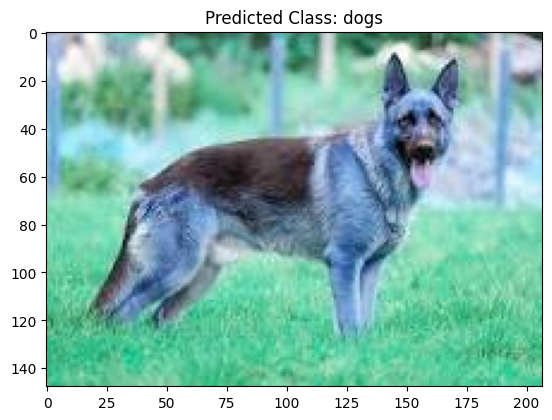

In [20]:
uploaded = files.upload()


image_name = list(uploaded.keys())[0]
image_data = uploaded[image_name]

temp_image_path = '/content/temp_image.jpg'
with open(temp_image_path, 'wb') as temp_image:
    temp_image.write(image_data)


new_image_features = extract_features(temp_image_path)

if new_image_features is not None:

    predicted_label = model.predict([new_image_features])[0]


    class_names = ['cats', 'dogs']
    predicted_class = class_names[predicted_label]


    plt.imshow(cv2.imread(temp_image_path))
    plt.title(f"Predicted Class: {predicted_class}")
    plt.show()

else:
    print("Error: Failed to extract features from the uploaded image.")
